In [1]:
%matplotlib notebook
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from matplotlib import cm
import matplotlib.pyplot as plt

import glob

In [2]:
# Make sure cuda is available
import torch
torch.cuda.is_available()

True

## Check the embeddings at 300 Epochs

## Eval embedding visualization

Read the style embeddings we're going to visualize, style embeddings are in the shape of `bz, 8`. In order to use the same PCA transform with all the following embeddings, we duplicate the style embeddings on its `axis=1`

In [36]:
def get_eval_embed(inp='.1r', type='style_embedding', folder='../eval_embedding/contrast_dual_style_causaldecode_group/P6_300test'):
    embeds = []
    labels = []
    for file in glob.glob('{}/*{}.npy'.format(folder, inp)):
        # print(file)
        embedding = np.load(file, allow_pickle=True)
        # print(embedding[()].keys()) 'style_embedding', 'label', 'latent_content_space', 'first_concat', 'second_concat'
        embed = np.array(embedding[()][type])
        embed_dim = embed.shape[1]
        embed = embed.reshape(-1, embed_dim)
        embeds.append(embed)
    embeds = np.vstack(embeds)
    # print(embeds.shape)
    ev_embeds = embeds
    return ev_embeds

n = 3
ev_embed_1_r = get_eval_embed(inp='*.1r').repeat(n, axis=1)
ev_embed_1_l = get_eval_embed(inp='*.1l').repeat(n, axis=1)
ev_embed_2_l = get_eval_embed(inp='*.2l').repeat(n, axis=1)
ev_embed_2_r = get_eval_embed(inp='*.2r').repeat(n, axis=1)
ev_embed_3_l = get_eval_embed(inp='*.3l').repeat(n, axis=1)
ev_embed_3_r = get_eval_embed(inp='*.3r').repeat(n, axis=1)
ev_embed_4_r = get_eval_embed(inp='*.4r').repeat(n, axis=1)
ev_embed_4_l = get_eval_embed(inp='*.4l').repeat(n, axis=1)
ev_embed_5_r = get_eval_embed(inp='*.5r').repeat(n, axis=1)
ev_embed_5_l = get_eval_embed(inp='*.5l').repeat(n, axis=1)
ev_embed_6_r = get_eval_embed(inp='*.6r').repeat(n, axis=1)
ev_embed_6_l = get_eval_embed(inp='*.6l').repeat(n, axis=1)
ev_embed_7_r = get_eval_embed(inp='*.7r').repeat(n, axis=1)
ev_embed_7_l = get_eval_embed(inp='*.7l').repeat(n, axis=1)

In [10]:
ev_embed_3_l.shape

(5000, 24)

fit a PCA with projection to 2 dims on the style embeddings

[0.6416511  0.25365612]


<IPython.core.display.Javascript object>


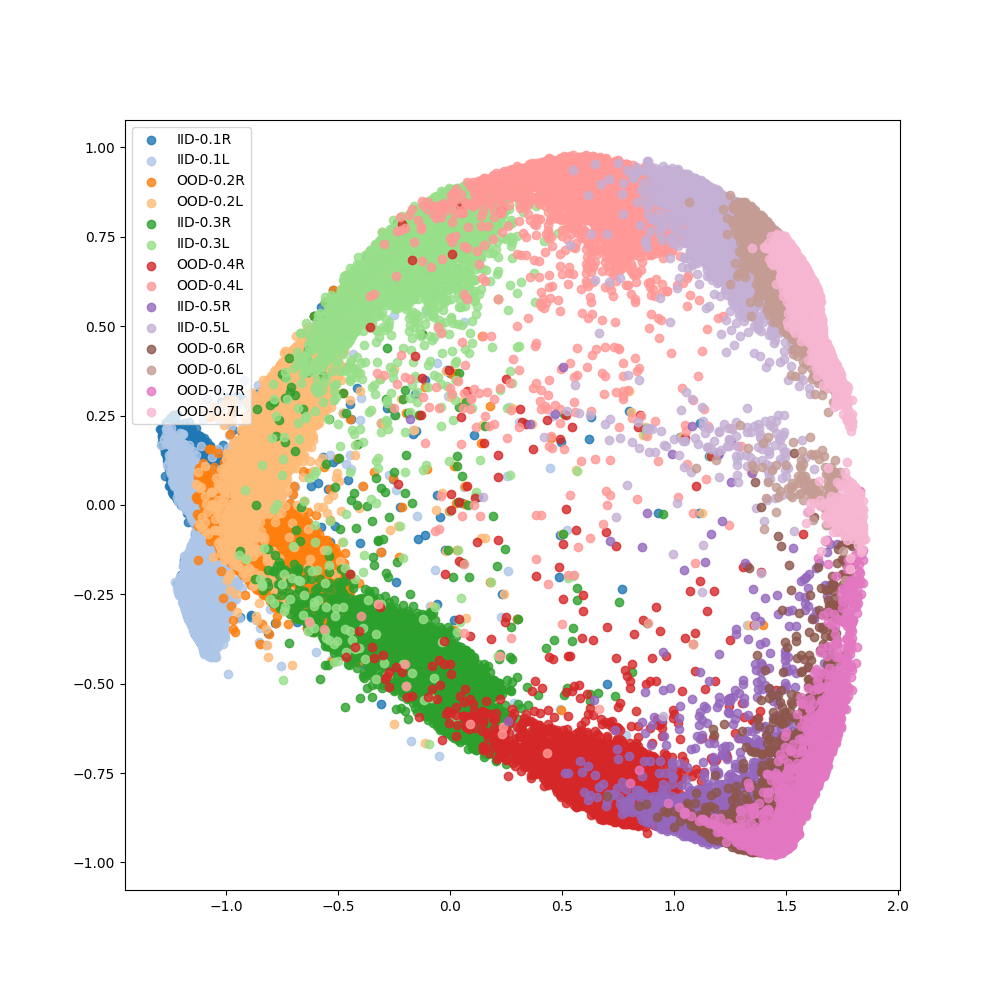

In [11]:
# fit a pca that projects to style embedding direction
eval_iid_embedding = np.vstack([ev_embed_1_r, ev_embed_1_l, ev_embed_3_r, ev_embed_3_l, ev_embed_5_r, ev_embed_5_l])
eval_all_embedding = np.vstack([ev_embed_1_r, ev_embed_1_l, ev_embed_2_r, ev_embed_2_l, ev_embed_3_r, ev_embed_3_l, ev_embed_4_r, ev_embed_4_l, ev_embed_5_r, ev_embed_5_l, ev_embed_6_r, ev_embed_6_l, ev_embed_7_r, ev_embed_7_l])
ev_labels = np.arange(14).reshape(-1, 1)
eval_labels = np.repeat(ev_labels, ev_embed_1_r.shape[0])

pca = PCA(n_components=2)
pca.fit(eval_iid_embedding)
pca_proj = pca.transform(eval_all_embedding)
print(pca.explained_variance_ratio_)
cmap = cm.get_cmap('tab20')
fig, ax = plt.subplots(figsize=(10,10))
num_categories = 14
legends = ['IID-0.1R', 'IID-0.1L', 'OOD-0.2R', 'OOD-0.2L', 'IID-0.3R', 'IID-0.3L', 'OOD-0.4R', 'OOD-0.4L', 'IID-0.5R', 'IID-0.5L', 'OOD-0.6R', 'OOD-0.6L', 'OOD-0.7R', 'OOD-0.7L']
for lab in range(num_categories):
    if lab in []:
        pass
    else:
        indices = eval_labels==lab
        ax.scatter(pca_proj[indices,0],pca_proj[indices,1], c=np.array(cmap(lab)).reshape(1,4), label = legends[lab] ,alpha=0.8)
plt.legend()

[0.6651704  0.27796945 0.05686013]


<IPython.core.display.Javascript object>


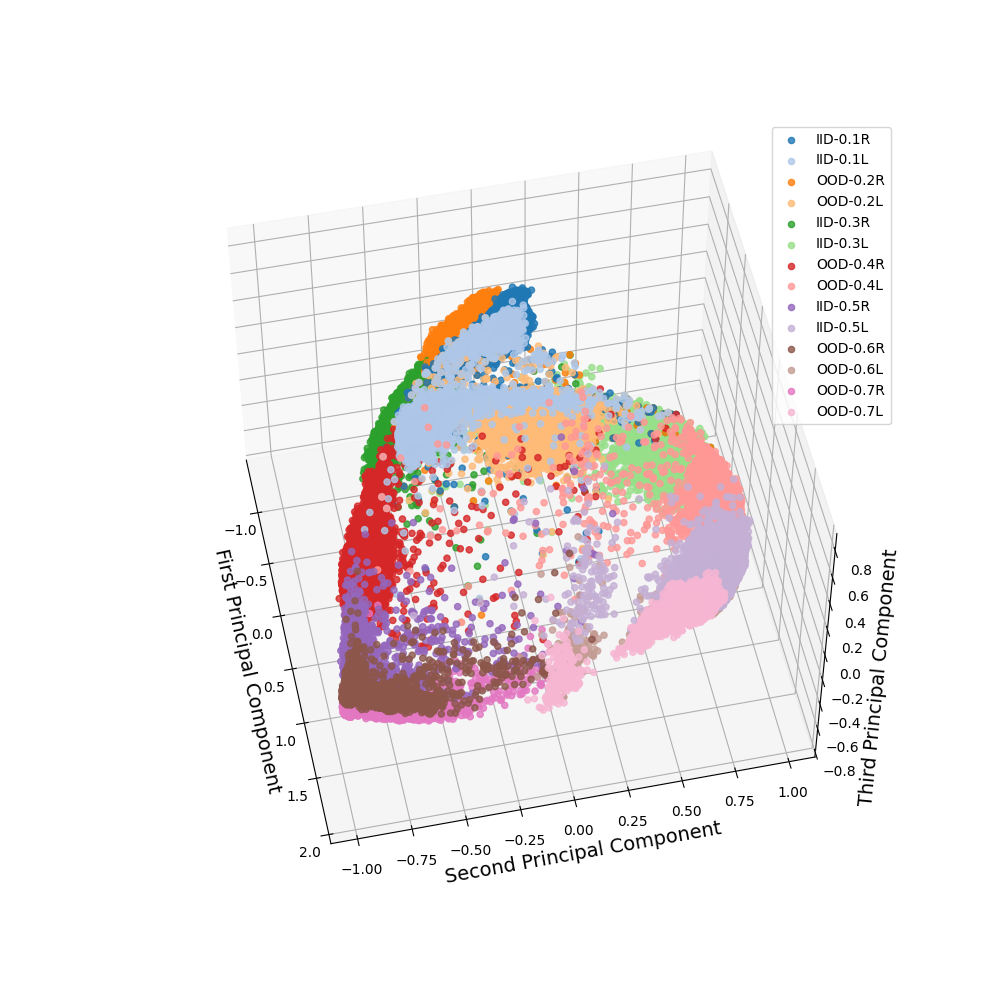

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = eval_iid_embedding
y = eval_labels
target_X = eval_all_embedding


pca = PCA(n_components=3)
pca.fit(X) 
X_pca = pca.transform(target_X) 

ex_variance=np.var(X_pca,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print(ex_variance_ratio)


Xax = X_pca[:,0]
Yax = X_pca[:,1]
Zax = X_pca[:,2]

cmap = cm.get_cmap('tab20')
legends = ['IID-0.1R', 'IID-0.1L', 'OOD-0.2R', 'OOD-0.2L', 'IID-0.3R', 'IID-0.3L', 'OOD-0.4R', 'OOD-0.4L', 'IID-0.5R', 'IID-0.5L', 'OOD-0.6R', 'OOD-0.6L', 'OOD-0.7R', 'OOD-0.7L']

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

fig.patch.set_facecolor('white')
for l in np.unique(y):
    ix=np.where(y==l)
    ax.scatter(Xax[ix], Yax[ix], Zax[ix], c=np.array(cmap(l)).reshape(1,4), label = legends[l] ,alpha=0.8)
# for loop ends
ax.set_xlabel("First Principal Component", fontsize=14)
ax.set_ylabel("Second Principal Component", fontsize=14)
ax.set_zlabel("Third Principal Component", fontsize=14)

ax.legend()
plt.show()

We also try to use T-SNE to visualize the style embedding, however, compared to PCA, T-SNE is non-deterministic, which means that it's outcome is random and cannot apply the same transformation to other embeddings.

/home/motran/miniconda3/envs/motion/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/motran/miniconda3/envs/motion/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 70000 samples in 0.002s...
[t-SNE] Computed neighbors for 70000 samples in 74.565s...
[t-SNE] Computed conditional probabilities for sample 1000 / 70000
[t-SNE] Computed conditional probabilities for sample 2000 / 70000
[t-SNE] Computed conditional probabilities for sample 3000 / 70000
[t-SNE] Computed conditional probabilities for sample 4000 / 70000
[t-SNE] Computed conditional probabilities for sample 5000 / 70000
[t-SNE] Computed conditional probabilities for sample 6000 / 70000
[t-SNE] Computed conditional probabilities for sample 7000 / 70000
[t-SNE] Computed conditional probabilities for sample 8000 / 70000
[t-SNE] Computed conditional probabilities for sample 9000 / 70000
[t-SNE] Computed conditional probabilities for sample 10000 / 70000
[t-SNE] Computed conditional probabilities for sample 11000 / 70000
[t-SNE] Computed conditional probabilities for sample 12000 / 70000
[t-SNE] Computed conditional probabilities for s

<IPython.core.display.Javascript object>


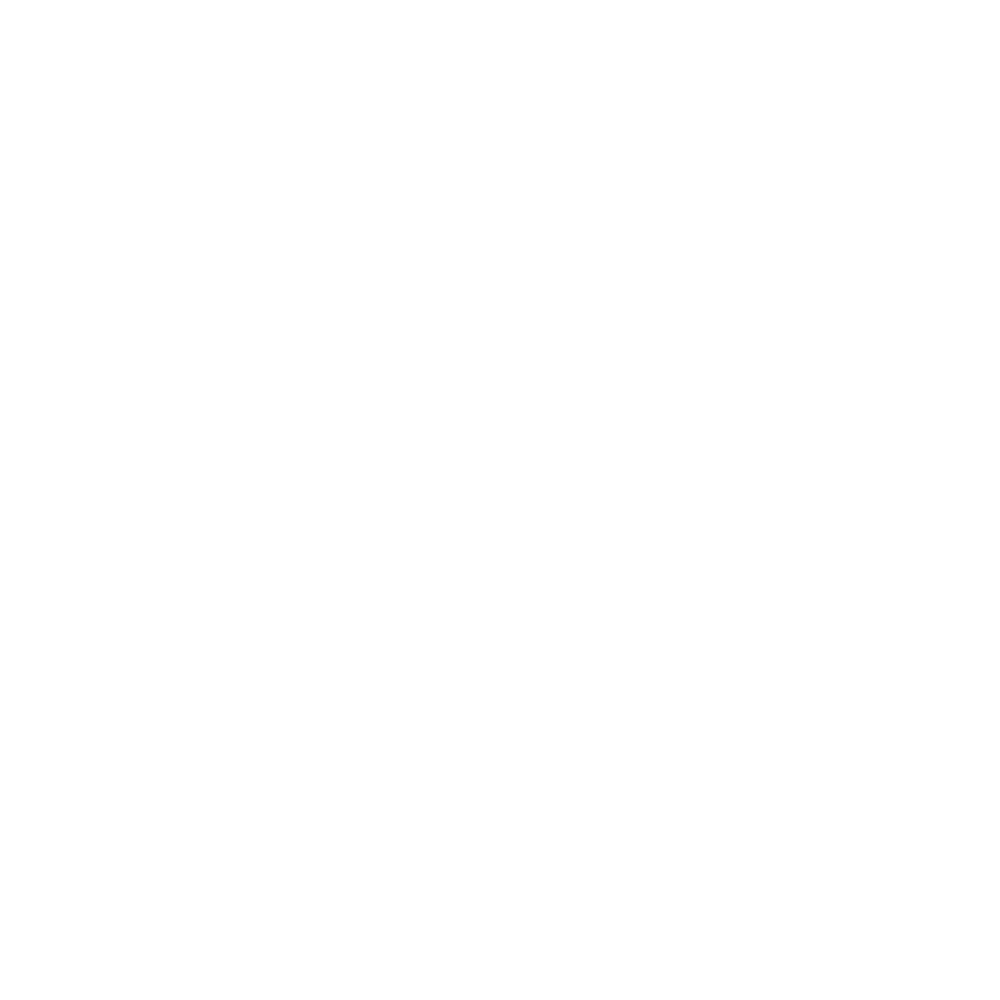

In [13]:
eval_iid_embedding = np.vstack([ev_embed_1_r, ev_embed_1_l, ev_embed_3_r, ev_embed_3_l, ev_embed_5_r, ev_embed_5_l])
eval_all_embedding = np.vstack([ev_embed_1_r, ev_embed_1_l, ev_embed_2_r, ev_embed_2_l, ev_embed_3_r, ev_embed_3_l, ev_embed_4_r, ev_embed_4_l, ev_embed_5_r, ev_embed_5_l, ev_embed_6_r, ev_embed_6_l, ev_embed_7_r, ev_embed_7_l])
ev_labels = np.arange(14).reshape(-1, 1)
eval_labels = np.repeat(ev_labels, ev_embed_1_r.shape[0])

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
# tsne.fit_transform(eval_iid_embedding)
pca_proj = tsne.fit_transform(eval_all_embedding)
print(pca_proj.shape)
# print(tsne.explained_variance_ratio_)
cmap = cm.get_cmap('tab20')
fig, ax = plt.subplots(figsize=(10,10))
num_categories = 14
legends = ['IID-0.1R', 'IID-0.1L', 'OOD-0.2R', 'OOD-0.2L', 'IID-0.3R', 'IID-0.3L', 'OOD-0.4R', 'OOD-0.4L', 'IID-0.5R', 'IID-0.5L', 'OOD-0.6R', 'OOD-0.6L', 'OOD-0.7R', 'OOD-0.7L']
for lab in range(num_categories):
    if lab in []:
        pass
    else:
        indices = eval_labels==lab
        ax.scatter(pca_proj[indices,0],pca_proj[indices,1], c=np.array(cmap(lab)).reshape(1,4), label = legends[lab] ,alpha=0.5)
plt.legend()

### Visualize the first concatenated embeddings
Get the first concatenated embeddings: <invariant, style>
The shape of concatenated embeddings are `bz, 24`

In [14]:
ev_embed_1_r = get_eval_embed(inp='*.1r', type='first_concat')
ev_embed_1_l = get_eval_embed(inp='*.1l', type='first_concat')
ev_embed_2_l = get_eval_embed(inp='*.2l', type='first_concat')
ev_embed_2_r = get_eval_embed(inp='*.2r', type='first_concat')
ev_embed_3_l = get_eval_embed(inp='*.3l', type='first_concat')
ev_embed_3_r = get_eval_embed(inp='*.3r', type='first_concat')
ev_embed_4_r = get_eval_embed(inp='*.4r', type='first_concat')
ev_embed_4_l = get_eval_embed(inp='*.4l', type='first_concat')
ev_embed_5_r = get_eval_embed(inp='*.5r', type='first_concat')

ev_embed_5_l = get_eval_embed(inp='*.5l', type='first_concat')
ev_embed_6_r = get_eval_embed(inp='*.6r', type='first_concat')
ev_embed_6_l = get_eval_embed(inp='*.6l', type='first_concat')
ev_embed_7_r = get_eval_embed(inp='*.7r', type='first_concat')
ev_embed_7_l = get_eval_embed(inp='*.7l', type='first_concat')

[0.6416511  0.25365606 0.07093754]


<IPython.core.display.Javascript object>


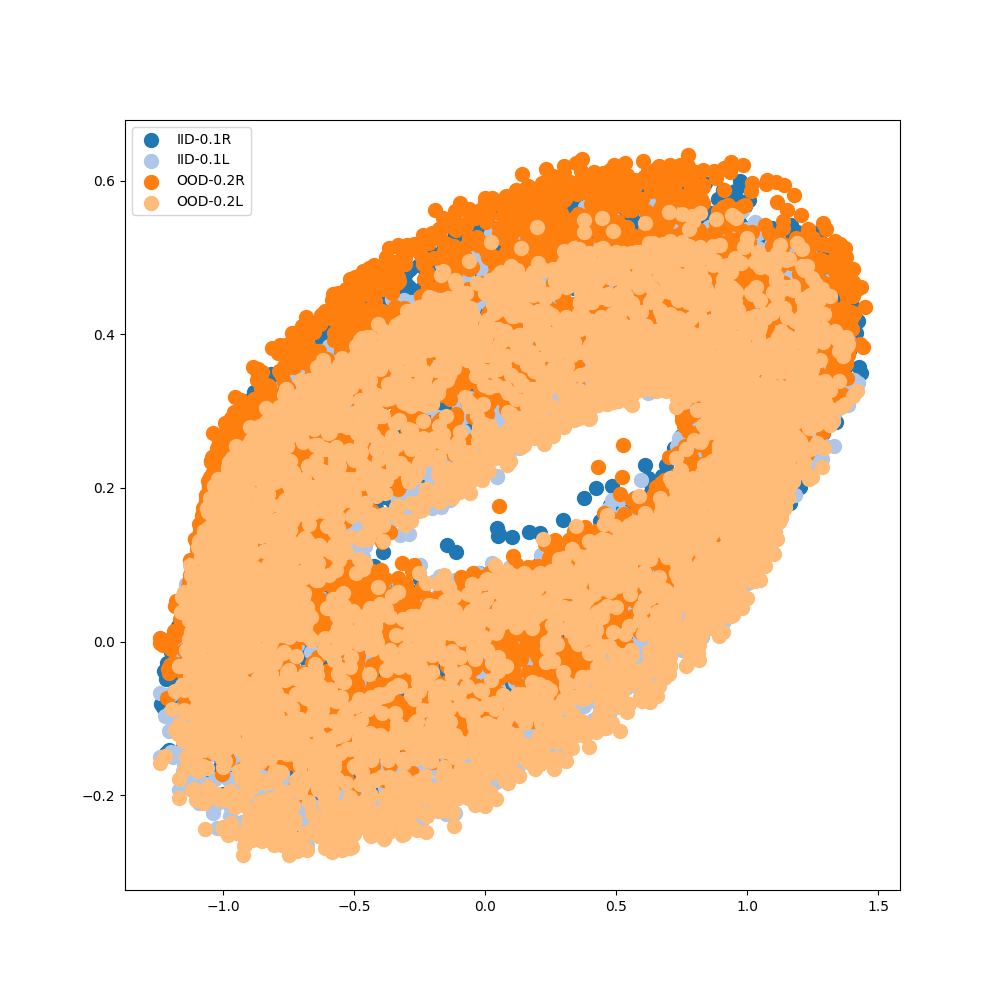

In [15]:
# plot concat embedding w.r.t style directions
eval_iid_embedding = np.vstack([ev_embed_1_r, ev_embed_1_l, ev_embed_3_r, ev_embed_3_l, ev_embed_5_r, ev_embed_5_l])
eval_all_embedding = np.vstack([ev_embed_1_r, ev_embed_1_l, ev_embed_2_r, ev_embed_2_l, ev_embed_3_r, ev_embed_3_l, ev_embed_4_r, ev_embed_4_l, ev_embed_5_r, ev_embed_5_l, ev_embed_6_r, ev_embed_6_l, ev_embed_7_r, ev_embed_7_l])
ev_labels = np.arange(14).reshape(-1, 1)
eval_labels = np.repeat(ev_labels, ev_embed_1_r.shape[0])
pca_proj = pca.transform(eval_all_embedding)
print(pca.explained_variance_ratio_)
cmap = cm.get_cmap('tab20')
fig, ax = plt.subplots(figsize=(10,10))
num_categories = 14
legends = ['IID-0.1R', 'IID-0.1L', 'OOD-0.2R', 'OOD-0.2L', 'IID-0.3R', 'IID-0.3L', 'OOD-0.4R', 'OOD-0.4L', 'IID-0.5R', 'IID-0.5L', 'OOD-0.6R', 'OOD-0.6L', 'OOD-0.7R', 'OOD-0.7L']
for lab in range(num_categories):
    if lab in [0, 1, 2, 3]:
        indices = eval_labels==lab
        ax.scatter(pca_proj[indices,1],pca_proj[indices,0], c=np.array(cmap(lab)).reshape(1,4), label = legends[lab] ,alpha=1, s=100)
plt.legend()


[0.05877767 0.76296586 0.17825638]


<IPython.core.display.Javascript object>


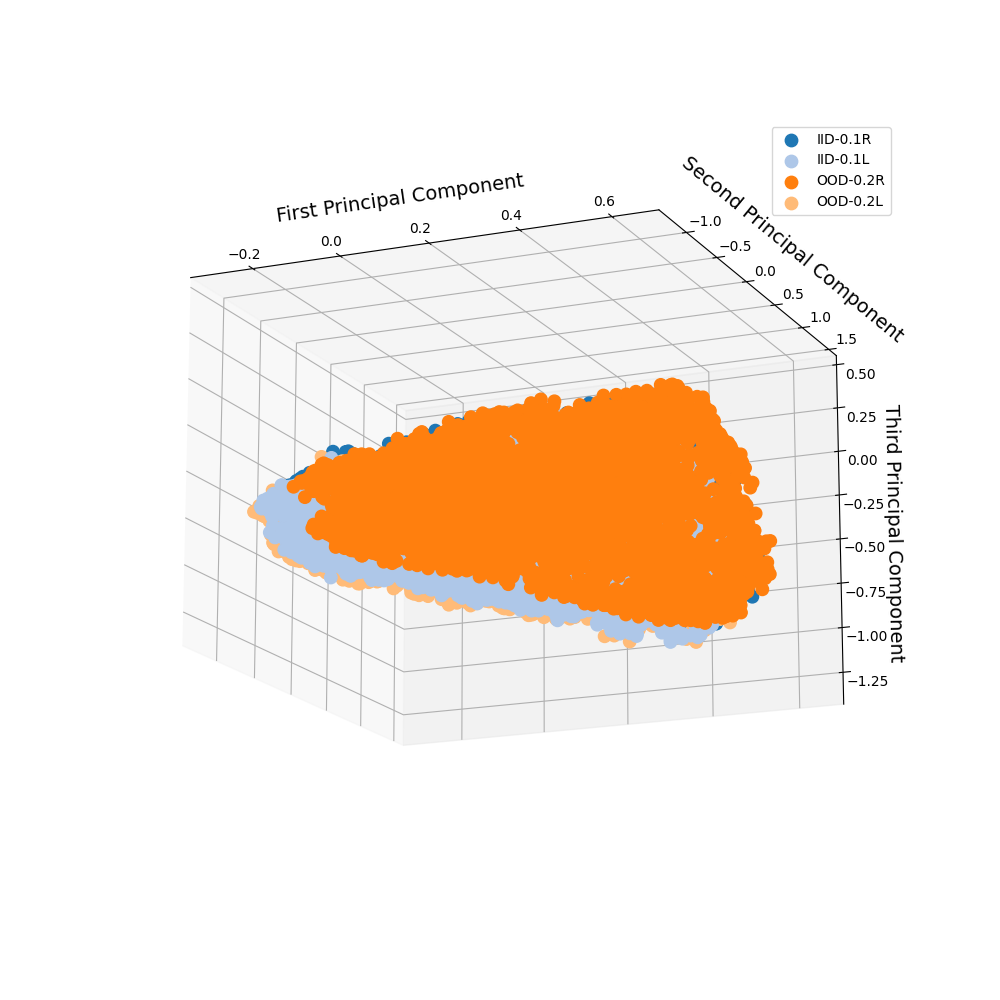

In [16]:
target_X = eval_all_embedding
X_pca = pca.transform(target_X) 

ex_variance=np.var(X_pca,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print(ex_variance_ratio)


Xax = X_pca[:,0]
Yax = X_pca[:,1]
Zax = X_pca[:,2]

cmap = cm.get_cmap('tab20')
legends = ['IID-0.1R', 'IID-0.1L', 'OOD-0.2R', 'OOD-0.2L', 'IID-0.3R', 'IID-0.3L', 'OOD-0.4R', 'OOD-0.4L', 'IID-0.5R', 'IID-0.5L', 'OOD-0.6R', 'OOD-0.6L', 'OOD-0.7R', 'OOD-0.7L']

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

fig.patch.set_facecolor('white')
for l in np.unique(y):
    if l in [0, 1,2, 3]:
        ix=np.where(y==l)
        ax.scatter(Xax[ix], Yax[ix], Zax[ix], c=np.array(cmap(l)).reshape(1,4), label = legends[l] ,alpha=1, s=80)
# for loop ends
ax.set_xlabel("First Principal Component", fontsize=14)
ax.set_ylabel("Second Principal Component", fontsize=14)
ax.set_zlabel("Third Principal Component", fontsize=14)

ax.legend()
plt.show()

Do the same with T-SNE

In [20]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
# tsne.fit_transform(eval_iid_embedding)
pca_proj = tsne.fit_transform(eval_all_embedding)
print(pca_proj.shape)
# print(tsne.explained_variance_ratio_)
cmap = cm.get_cmap('tab20')
fig, ax = plt.subplots(figsize=(10,10))
num_categories = 14
legends = ['IID-0.1R', 'IID-0.1L', 'OOD-0.2R', 'OOD-0.2L', 'IID-0.3R', 'IID-0.3L', 'OOD-0.4R', 'OOD-0.4L', 'IID-0.5R', 'IID-0.5L', 'OOD-0.6R', 'OOD-0.6L', 'OOD-0.7R', 'OOD-0.7L']
for lab in range(num_categories):
    if lab in []:
        pass
    else:
        indices = eval_labels==lab
        ax.scatter(pca_proj[indices,0],pca_proj[indices,1], c=np.array(cmap(lab)).reshape(1,4), label = legends[lab] ,alpha=1)
plt.legend()

/home/motran/miniconda3/envs/motion/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/motran/miniconda3/envs/motion/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 70000 samples in 0.003s...


KeyboardInterrupt: 

### Visualize the invariant embeddings

In [21]:
ev_embed_1_r = get_eval_embed(inp='*.1r', type='latent_content_space')
ev_embed_1_l = get_eval_embed(inp='*.1l', type='latent_content_space')
ev_embed_2_l = get_eval_embed(inp='*.2l', type='latent_content_space')
ev_embed_2_r = get_eval_embed(inp='*.2r', type='latent_content_space')
ev_embed_3_l = get_eval_embed(inp='*.3l', type='latent_content_space')
ev_embed_3_r = get_eval_embed(inp='*.3r', type='latent_content_space')
ev_embed_4_r = get_eval_embed(inp='*.4r', type='latent_content_space')
ev_embed_4_l = get_eval_embed(inp='*.4l', type='latent_content_space')
ev_embed_5_r = get_eval_embed(inp='*.5r', type='latent_content_space')

ev_embed_5_l = get_eval_embed(inp='*.5l', type='latent_content_space')
ev_embed_6_r = get_eval_embed(inp='*.6r', type='latent_content_space')
ev_embed_6_l = get_eval_embed(inp='*.6l', type='latent_content_space')
ev_embed_7_r = get_eval_embed(inp='*.7r', type='latent_content_space')
ev_embed_7_l = get_eval_embed(inp='*.7l', type='latent_content_space')

[0.2669854 0.2265715]


<IPython.core.display.Javascript object>


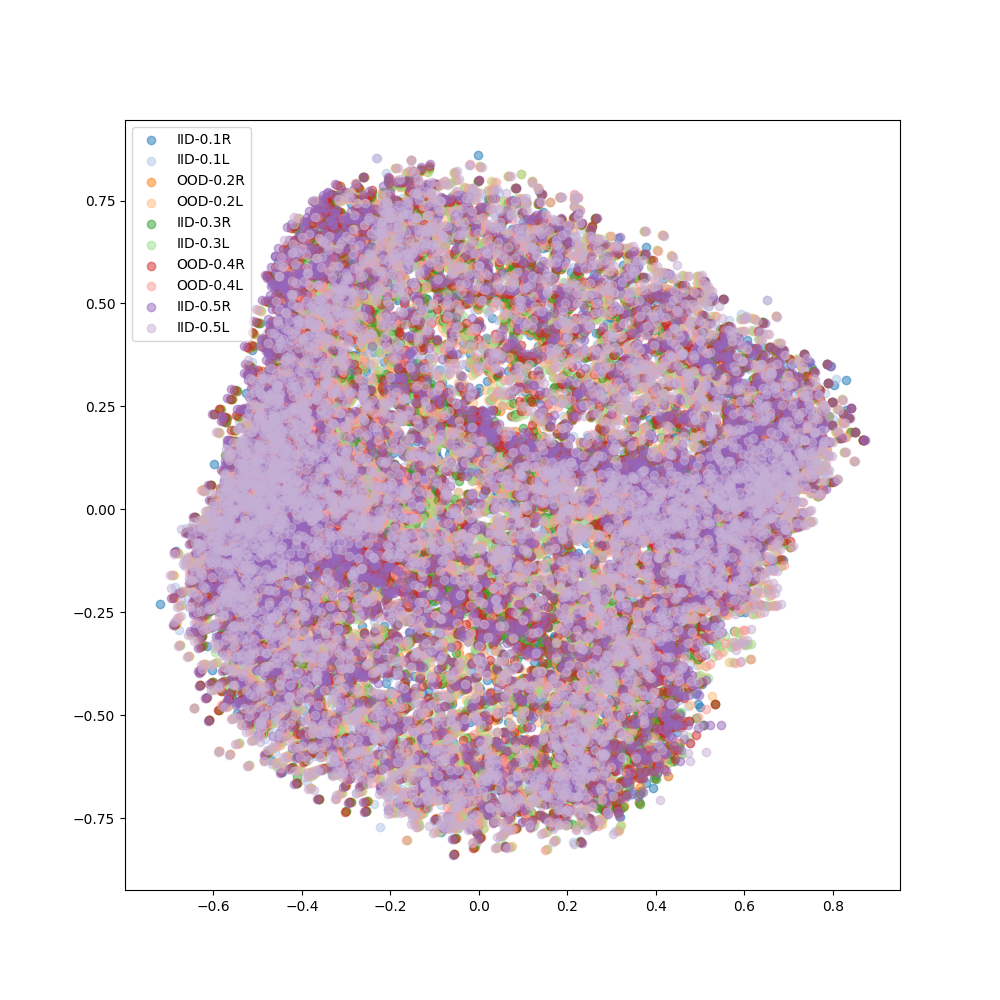

In [34]:
eval_iid_embedding = np.vstack([ev_embed_1_r, ev_embed_1_l, ev_embed_3_r, ev_embed_3_l, ev_embed_5_r, ev_embed_5_l])
eval_all_embedding = np.vstack([ev_embed_1_r, ev_embed_1_l, ev_embed_2_r, ev_embed_2_l, ev_embed_3_r, ev_embed_3_l, ev_embed_4_r, ev_embed_4_l, ev_embed_5_r, ev_embed_5_l, ev_embed_6_r, ev_embed_6_l, ev_embed_7_r, ev_embed_7_l])
ev_labels = np.arange(14).reshape(-1, 1)
eval_labels = np.repeat(ev_labels, ev_embed_1_r.shape[0])

pca = PCA(n_components=2)
pca.fit(eval_iid_embedding)
pca_proj = pca.transform(eval_all_embedding)
print(pca.explained_variance_ratio_)
cmap = cm.get_cmap('tab20')
fig, ax = plt.subplots(figsize=(10,10))
num_categories = 14
legends = ['IID-0.1R', 'IID-0.1L', 'OOD-0.2R', 'OOD-0.2L', 'IID-0.3R', 'IID-0.3L', 'OOD-0.4R', 'OOD-0.4L', 'IID-0.5R', 'IID-0.5L', 'OOD-0.6R', 'OOD-0.6L', 'OOD-0.7R', 'OOD-0.7L']
for lab in range(num_categories):
    if lab in [10, 11, 12, 13]:
        pass
    else:
        indices = eval_labels==lab
        ax.scatter(pca_proj[indices,0],pca_proj[indices,1], c=np.array(cmap(lab)).reshape(1,4), label = legends[lab] ,alpha=0.5)
plt.legend()


[0.3856927  0.31747377 0.29683352]


<IPython.core.display.Javascript object>


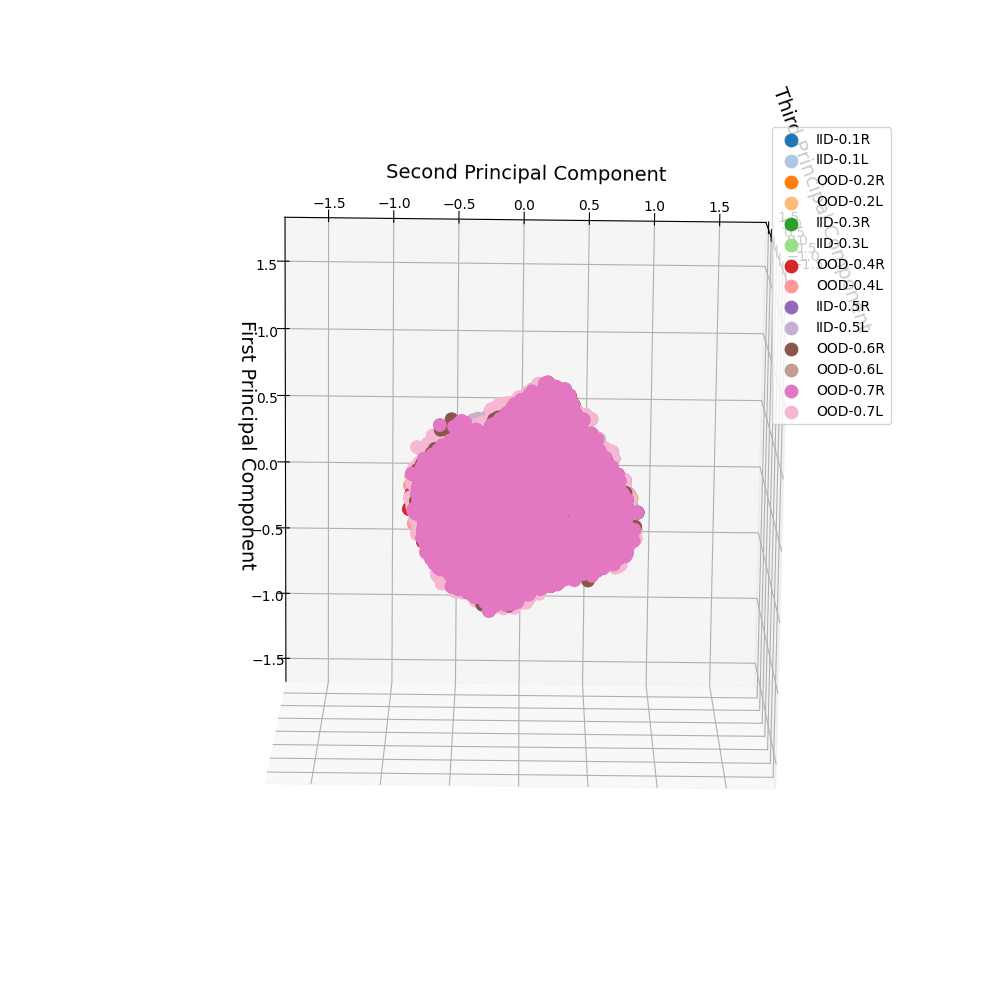

In [31]:
X = eval_iid_embedding
y = eval_labels
target_X = eval_all_embedding


pca = PCA(n_components=3)
pca.fit(X) 
X_pca = pca.transform(target_X) 

ex_variance=np.var(X_pca,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print(ex_variance_ratio)


Xax = X_pca[:,0]
Yax = X_pca[:,1]
Zax = X_pca[:,2]

cmap = cm.get_cmap('tab20')
legends = ['IID-0.1R', 'IID-0.1L', 'OOD-0.2R', 'OOD-0.2L', 'IID-0.3R', 'IID-0.3L', 'OOD-0.4R', 'OOD-0.4L', 'IID-0.5R', 'IID-0.5L', 'OOD-0.6R', 'OOD-0.6L', 'OOD-0.7R', 'OOD-0.7L']

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

fig.patch.set_facecolor('white')
for l in np.unique(y):
    ix=np.where(y==l)
    ax.scatter(Xax[ix], Yax[ix], Zax[ix], c=np.array(cmap(l)).reshape(1,4), label = legends[l] ,alpha=1, s=80)
# for loop ends
ax.set_xlabel("First Principal Component", fontsize=14)
ax.set_ylabel("Second Principal Component", fontsize=14)
ax.set_zlabel("Third Principal Component", fontsize=14)

ax.legend()
plt.show()

In [26]:
# fig.savefig('pca-latent-full.png', dpi=300, bbox_inches="tight")

/home/motran/miniconda3/envs/motion/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/motran/miniconda3/envs/motion/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 70000 samples in 0.002s...
[t-SNE] Computed neighbors for 70000 samples in 104.286s...
[t-SNE] Computed conditional probabilities for sample 1000 / 70000
[t-SNE] Computed conditional probabilities for sample 2000 / 70000
[t-SNE] Computed conditional probabilities for sample 3000 / 70000
[t-SNE] Computed conditional probabilities for sample 4000 / 70000
[t-SNE] Computed conditional probabilities for sample 5000 / 70000
[t-SNE] Computed conditional probabilities for sample 6000 / 70000
[t-SNE] Computed conditional probabilities for sample 7000 / 70000
[t-SNE] Computed conditional probabilities for sample 8000 / 70000
[t-SNE] Computed conditional probabilities for sample 9000 / 70000
[t-SNE] Computed conditional probabilities for sample 10000 / 70000
[t-SNE] Computed conditional probabilities for sample 11000 / 70000
[t-SNE] Computed conditional probabilities for sample 12000 / 70000
[t-SNE] Computed conditional probabilities for 

<IPython.core.display.Javascript object>


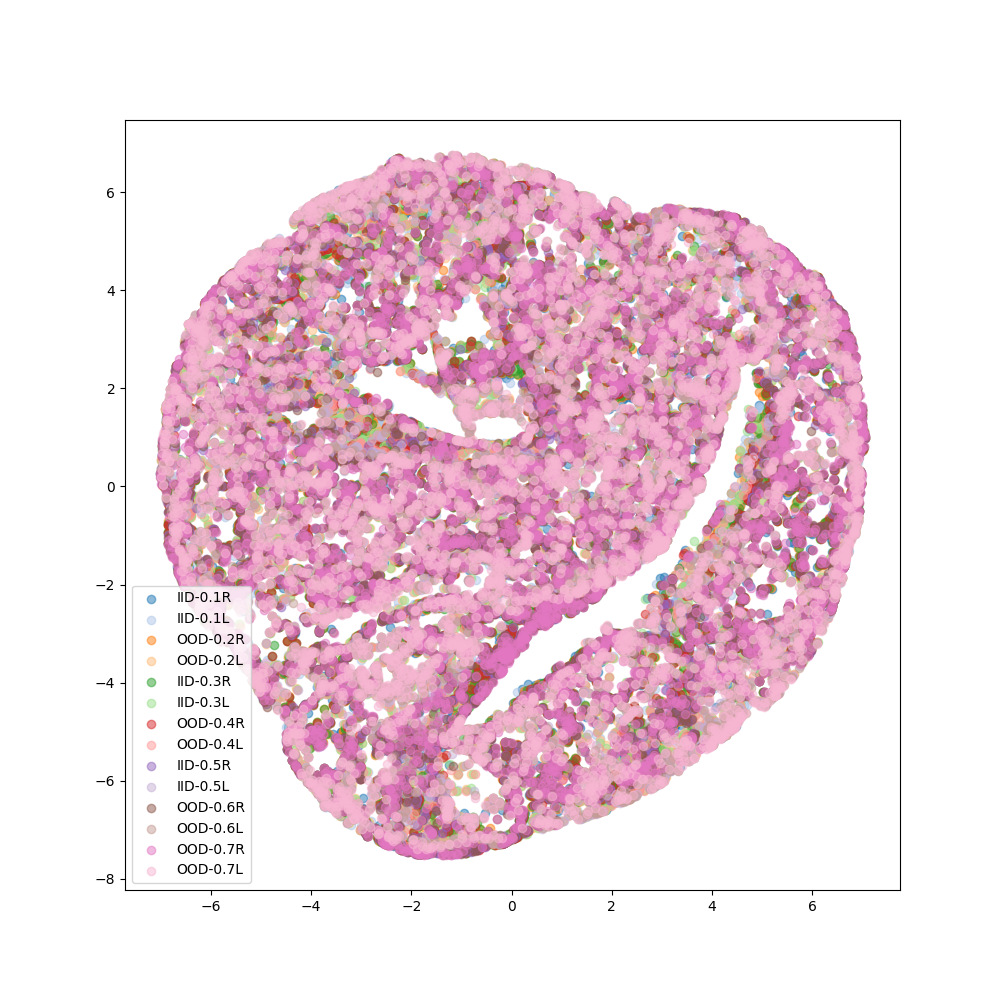

In [27]:
eval_iid_embedding = np.vstack([ev_embed_1_r, ev_embed_1_l, ev_embed_3_r, ev_embed_3_l, ev_embed_5_r, ev_embed_5_l])
eval_all_embedding = np.vstack([ev_embed_1_r, ev_embed_1_l, ev_embed_2_r, ev_embed_2_l, ev_embed_3_r, ev_embed_3_l, ev_embed_4_r, ev_embed_4_l, ev_embed_5_r, ev_embed_5_l, ev_embed_6_r, ev_embed_6_l, ev_embed_7_r, ev_embed_7_l])
ev_labels = np.arange(14).reshape(-1, 1)
eval_labels = np.repeat(ev_labels, ev_embed_1_r.shape[0])

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
# tsne.fit_transform(eval_iid_embedding)
pca_proj = tsne.fit_transform(eval_all_embedding)
print(pca_proj.shape)
# print(tsne.explained_variance_ratio_)
cmap = cm.get_cmap('tab20')
fig, ax = plt.subplots(figsize=(10,10))
num_categories = 14
legends = ['IID-0.1R', 'IID-0.1L', 'OOD-0.2R', 'OOD-0.2L', 'IID-0.3R', 'IID-0.3L', 'OOD-0.4R', 'OOD-0.4L', 'IID-0.5R', 'IID-0.5L', 'OOD-0.6R', 'OOD-0.6L', 'OOD-0.7R', 'OOD-0.7L']
for lab in range(num_categories):
    if lab in []:
        pass
    else:
        indices = eval_labels==lab
        ax.scatter(pca_proj[indices,0],pca_proj[indices,1], c=np.array(cmap(lab)).reshape(1,4), label = legends[lab] ,alpha=0.5)
plt.legend()


In [28]:
# fig.savefig('tsne-style.png', dpi=300, bbox_inches="tight")

### Check the embeddings at 700 Epochs

In [37]:
def get_eval_embed(inp='.1r', type='style_embedding', folder='../eval_embedding/contrast_dual_style_causaldecode_group/P6_700test'):
    embeds = []
    labels = []
    for file in glob.glob('{}/*{}.npy'.format(folder, inp)):
        # print(file)
        embedding = np.load(file, allow_pickle=True)
        # print(embedding[()].keys()) 'style_embedding', 'label', 'latent_content_space', 'first_concat', 'second_concat'
        embed = np.array(embedding[()][type])
        embed_dim = embed.shape[1]
        embed = embed.reshape(-1, embed_dim)
        embeds.append(embed)
    embeds = np.vstack(embeds)
    # print(embeds.shape)
    ev_embeds = embeds
    return ev_embeds

n = 3
ev_embed_1_r = get_eval_embed(inp='*.1r').repeat(n, axis=1)
ev_embed_1_l = get_eval_embed(inp='*.1l').repeat(n, axis=1)
ev_embed_2_l = get_eval_embed(inp='*.2l').repeat(n, axis=1)
ev_embed_2_r = get_eval_embed(inp='*.2r').repeat(n, axis=1)
ev_embed_3_l = get_eval_embed(inp='*.3l').repeat(n, axis=1)
ev_embed_3_r = get_eval_embed(inp='*.3r').repeat(n, axis=1)
ev_embed_4_r = get_eval_embed(inp='*.4r').repeat(n, axis=1)
ev_embed_4_l = get_eval_embed(inp='*.4l').repeat(n, axis=1)
ev_embed_5_r = get_eval_embed(inp='*.5r').repeat(n, axis=1)
ev_embed_5_l = get_eval_embed(inp='*.5l').repeat(n, axis=1)
ev_embed_6_r = get_eval_embed(inp='*.6r').repeat(n, axis=1)
ev_embed_6_l = get_eval_embed(inp='*.6l').repeat(n, axis=1)
ev_embed_7_r = get_eval_embed(inp='*.7r').repeat(n, axis=1)
ev_embed_7_l = get_eval_embed(inp='*.7l').repeat(n, axis=1)

In [38]:
ev_embed_3_l.shape

(5000, 24)

[0.65155125 0.21860775]


<IPython.core.display.Javascript object>


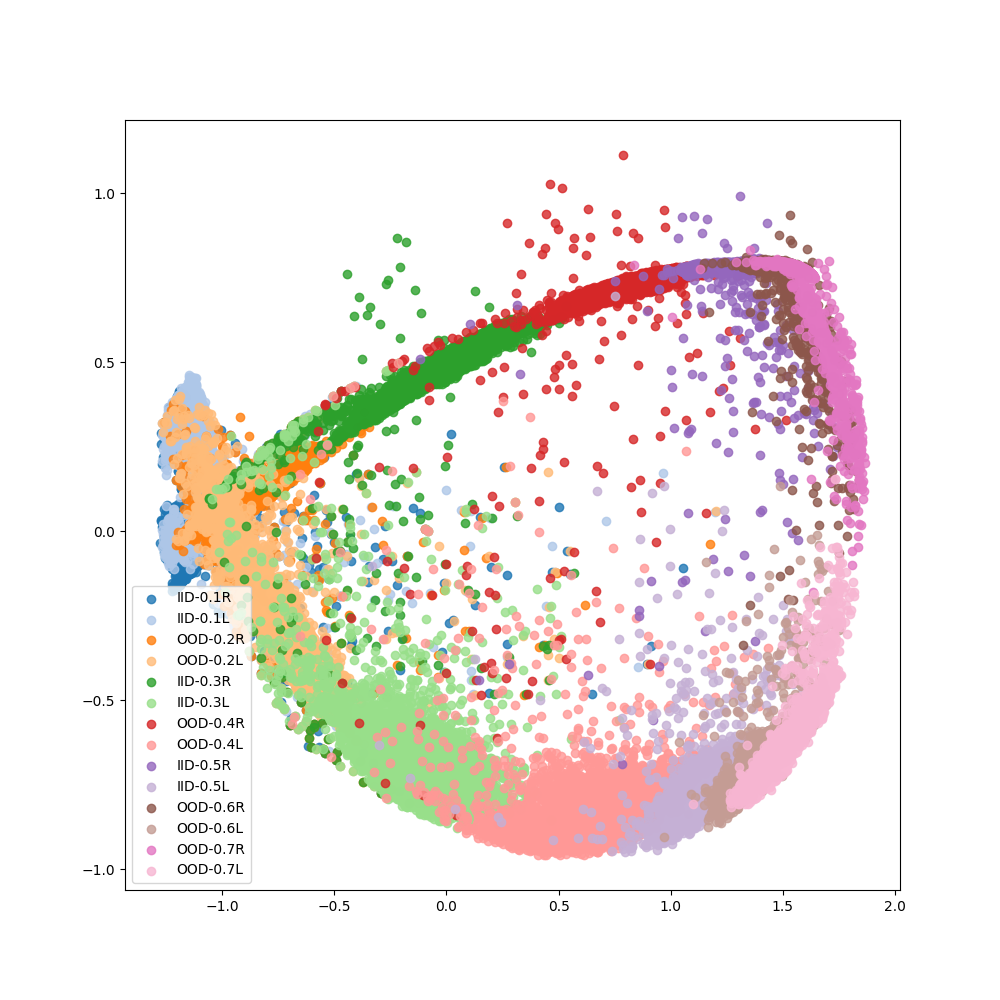

In [39]:
# fit a pca that projects to style embedding direction
eval_iid_embedding = np.vstack([ev_embed_1_r, ev_embed_1_l, ev_embed_3_r, ev_embed_3_l, ev_embed_5_r, ev_embed_5_l])
eval_all_embedding = np.vstack([ev_embed_1_r, ev_embed_1_l, ev_embed_2_r, ev_embed_2_l, ev_embed_3_r, ev_embed_3_l, ev_embed_4_r, ev_embed_4_l, ev_embed_5_r, ev_embed_5_l, ev_embed_6_r, ev_embed_6_l, ev_embed_7_r, ev_embed_7_l])
ev_labels = np.arange(14).reshape(-1, 1)
eval_labels = np.repeat(ev_labels, ev_embed_1_r.shape[0])

pca = PCA(n_components=2)
pca.fit(eval_iid_embedding)
pca_proj = pca.transform(eval_all_embedding)
print(pca.explained_variance_ratio_)
cmap = cm.get_cmap('tab20')
fig, ax = plt.subplots(figsize=(10,10))
num_categories = 14
legends = ['IID-0.1R', 'IID-0.1L', 'OOD-0.2R', 'OOD-0.2L', 'IID-0.3R', 'IID-0.3L', 'OOD-0.4R', 'OOD-0.4L', 'IID-0.5R', 'IID-0.5L', 'OOD-0.6R', 'OOD-0.6L', 'OOD-0.7R', 'OOD-0.7L']
for lab in range(num_categories):
    if lab in []:
        pass
    else:
        indices = eval_labels==lab
        ax.scatter(pca_proj[indices,0],pca_proj[indices,1], c=np.array(cmap(lab)).reshape(1,4), label = legends[lab] ,alpha=0.8)
plt.legend()

[0.6804556 0.2443032 0.0752412]


<IPython.core.display.Javascript object>


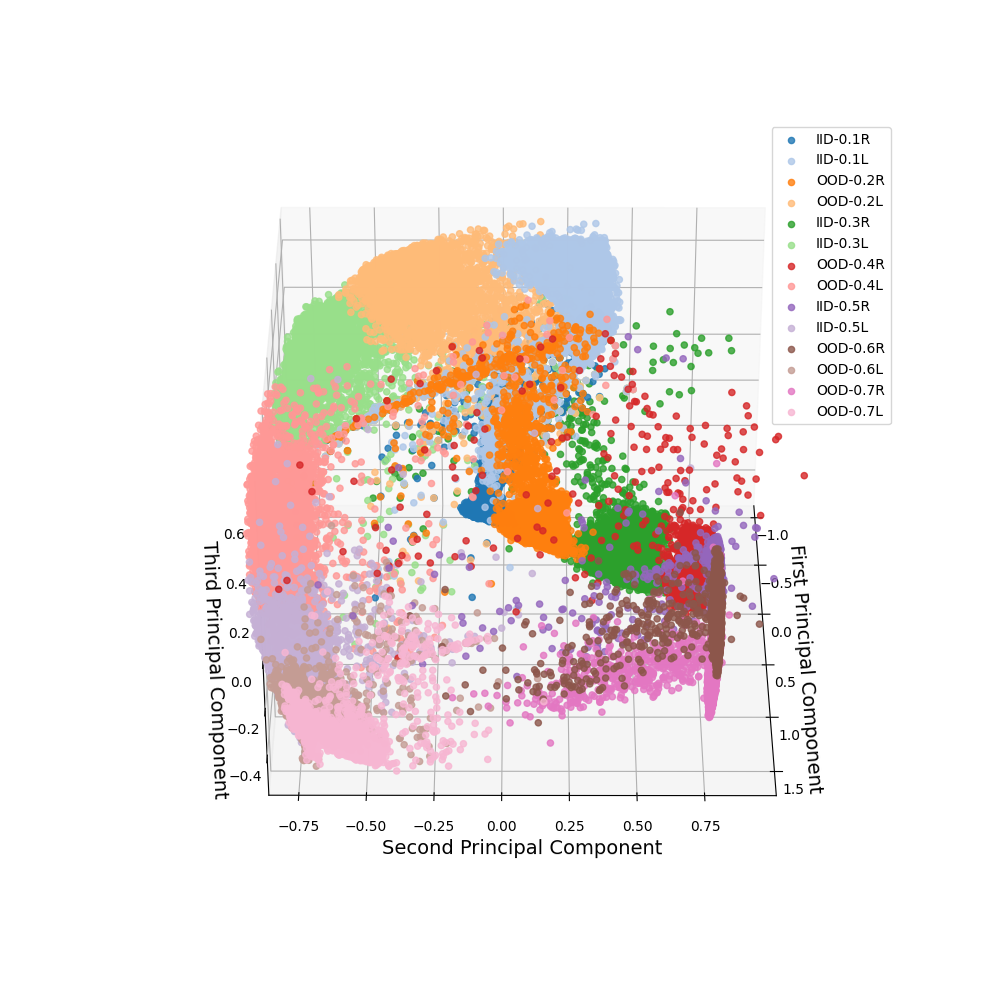

In [40]:
X = eval_iid_embedding
y = eval_labels
target_X = eval_all_embedding


pca = PCA(n_components=3)
pca.fit(X) 
X_pca = pca.transform(target_X) 

ex_variance=np.var(X_pca,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print(ex_variance_ratio)


Xax = X_pca[:,0]
Yax = X_pca[:,1]
Zax = X_pca[:,2]

cmap = cm.get_cmap('tab20')
legends = ['IID-0.1R', 'IID-0.1L', 'OOD-0.2R', 'OOD-0.2L', 'IID-0.3R', 'IID-0.3L', 'OOD-0.4R', 'OOD-0.4L', 'IID-0.5R', 'IID-0.5L', 'OOD-0.6R', 'OOD-0.6L', 'OOD-0.7R', 'OOD-0.7L']

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

fig.patch.set_facecolor('white')
for l in np.unique(y):
    ix=np.where(y==l)
    ax.scatter(Xax[ix], Yax[ix], Zax[ix], c=np.array(cmap(l)).reshape(1,4), label = legends[l] ,alpha=0.8)
# for loop ends
ax.set_xlabel("First Principal Component", fontsize=14)
ax.set_ylabel("Second Principal Component", fontsize=14)
ax.set_zlabel("Third Principal Component", fontsize=14)

ax.legend()
plt.show()

In [80]:
ev_embed_1_r = get_eval_embed(inp='*.1r', type='first_concat')
ev_embed_1_l = get_eval_embed(inp='*.1l', type='first_concat')
ev_embed_2_l = get_eval_embed(inp='*.2l', type='first_concat')
ev_embed_2_r = get_eval_embed(inp='*.2r', type='first_concat')
ev_embed_3_l = get_eval_embed(inp='*.3l', type='first_concat')
ev_embed_3_r = get_eval_embed(inp='*.3r', type='first_concat')
ev_embed_4_r = get_eval_embed(inp='*.4r', type='first_concat')
ev_embed_4_l = get_eval_embed(inp='*.4l', type='first_concat')
ev_embed_5_r = get_eval_embed(inp='*.5r', type='first_concat')

ev_embed_5_l = get_eval_embed(inp='*.5l', type='first_concat')
ev_embed_6_r = get_eval_embed(inp='*.6r', type='first_concat')
ev_embed_6_l = get_eval_embed(inp='*.6l', type='first_concat')
ev_embed_7_r = get_eval_embed(inp='*.7r', type='first_concat')
ev_embed_7_l = get_eval_embed(inp='*.7l', type='first_concat')

[0.5778344  0.37757215 0.03271684]


<IPython.core.display.Javascript object>


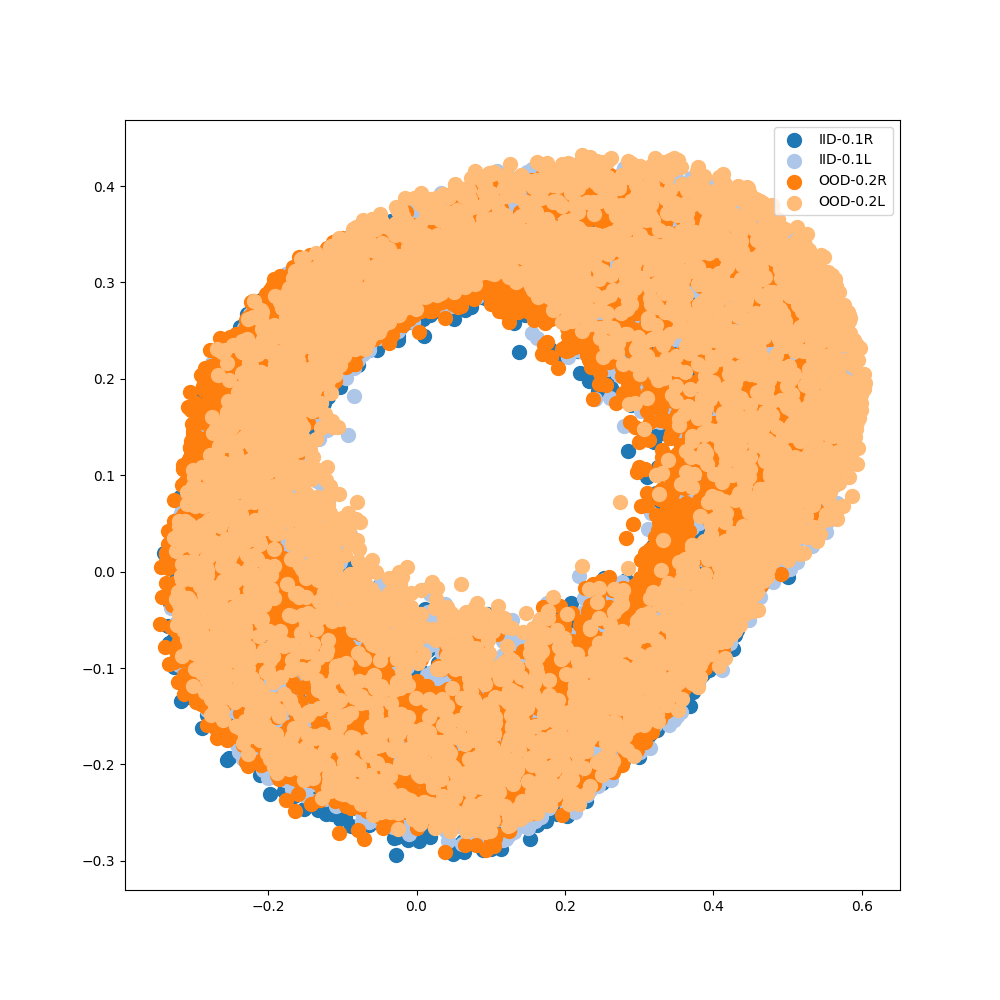

In [81]:
# plot concat embedding w.r.t style directions
eval_iid_embedding = np.vstack([ev_embed_1_r, ev_embed_1_l, ev_embed_3_r, ev_embed_3_l, ev_embed_5_r, ev_embed_5_l])
eval_all_embedding = np.vstack([ev_embed_1_r, ev_embed_1_l, ev_embed_2_r, ev_embed_2_l, ev_embed_3_r, ev_embed_3_l, ev_embed_4_r, ev_embed_4_l, ev_embed_5_r, ev_embed_5_l, ev_embed_6_r, ev_embed_6_l, ev_embed_7_r, ev_embed_7_l])
ev_labels = np.arange(14).reshape(-1, 1)
eval_labels = np.repeat(ev_labels, ev_embed_1_r.shape[0])
pca_proj = pca.transform(eval_all_embedding)
print(pca.explained_variance_ratio_)
cmap = cm.get_cmap('tab20')
fig, ax = plt.subplots(figsize=(10,10))
num_categories = 14
legends = ['IID-0.1R', 'IID-0.1L', 'OOD-0.2R', 'OOD-0.2L', 'IID-0.3R', 'IID-0.3L', 'OOD-0.4R', 'OOD-0.4L', 'IID-0.5R', 'IID-0.5L', 'OOD-0.6R', 'OOD-0.6L', 'OOD-0.7R', 'OOD-0.7L']
for lab in range(num_categories):
    if lab in [0, 1, 2, 3]:
        indices = eval_labels==lab
        ax.scatter(pca_proj[indices,1],pca_proj[indices,0], c=np.array(cmap(lab)).reshape(1,4), label = legends[lab] ,alpha=1, s=100)
plt.legend()


[0.26561186 0.53592515 0.19846296]


<IPython.core.display.Javascript object>


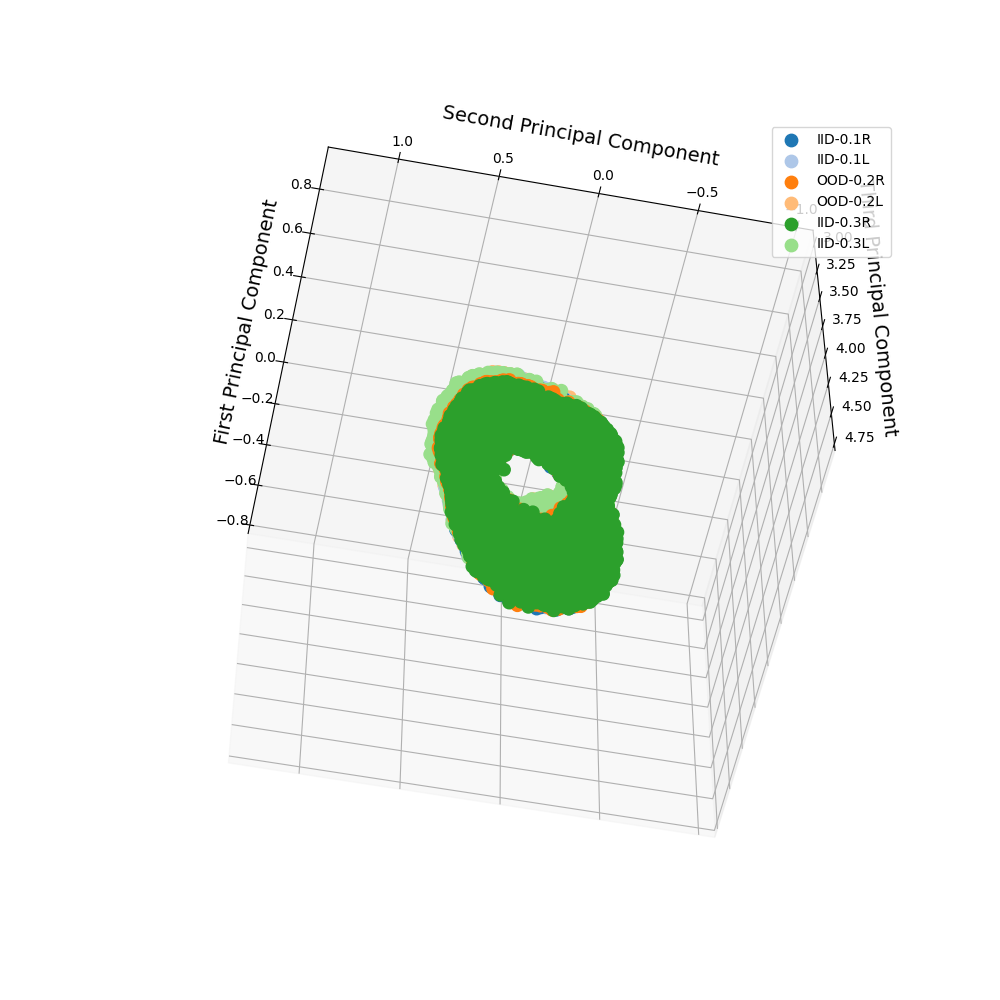

In [85]:
target_X = eval_all_embedding
X_pca = pca.transform(target_X) 

ex_variance=np.var(X_pca,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print(ex_variance_ratio)


Xax = X_pca[:,0]
Yax = X_pca[:,1]
Zax = X_pca[:,2]

cmap = cm.get_cmap('tab20')
legends = ['IID-0.1R', 'IID-0.1L', 'OOD-0.2R', 'OOD-0.2L', 'IID-0.3R', 'IID-0.3L', 'OOD-0.4R', 'OOD-0.4L', 'IID-0.5R', 'IID-0.5L', 'OOD-0.6R', 'OOD-0.6L', 'OOD-0.7R', 'OOD-0.7L']

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

fig.patch.set_facecolor('white')
for l in np.unique(y):
    if l in [0, 1,2, 3, 4, 5]:
        ix=np.where(y==l)
        ax.scatter(Xax[ix], Yax[ix], Zax[ix], c=np.array(cmap(l)).reshape(1,4), label = legends[l] ,alpha=1, s=80)
# for loop ends
ax.set_xlabel("First Principal Component", fontsize=14)
ax.set_ylabel("Second Principal Component", fontsize=14)
ax.set_zlabel("Third Principal Component", fontsize=14)

ax.legend()
plt.show()